In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# ODE

**Theorem:**

Any $n^{th}$ order ODE can be transformed into $n$ 1st order ODEs.

<br>

**Example:**

Let's take the following equation:


$$ \large mx'' + \beta x' + kx - mg = 0$$

which describes a simple harmonic oscillator - mass on a spring.

<br>

We can transform it into a matrix of 1st order ODEs in a following way:

* Put $x''$ on the lhs:

$$ \large x'' = \frac{mg - \beta x' - kx}{m}$$

* Define a helper variable:

$$ \large x' = v$$

* Re-write the equation using the helper var:

$$\large v' = g - \frac{\beta}{m}v - \frac{k}{m}x$$

* Re-write the system using vector noatation:

$$\large \begin{bmatrix} x' \\ v' \end{bmatrix} = \begin{bmatrix} v \\ g - \frac{\beta}{m}v - \frac{k}{m}x \end{bmatrix}$$

<br>

**Tip:** 2-dimensional state space is not enough for chaos. It requires at least three dimensions for a contiuous time problems.

## Euler solvers


### Forward (explicit) Euler


$$ \large x(t_0 + \Delta t) = x(t_0) + \Delta t \cdot x'(t)$$


### Backward (implicit) Euler


$$ \large x(t_0 + \Delta t) = x(t_0) + \Delta t \cdot x'_{FE}(t_0 + \Delta t)$$

In [11]:
def get_v_prime(x, v, k, m, g, beta):
    return g - (beta / m) * v - (k / m) * x

In [44]:
x = -1
v = -2
k = 2
m = .5
g = 0
beta = 0
delta_t = .001

In [45]:
# Compute teh first derrivative of v
v_prime = get_v_prime(x, v, k, m, g, beta)

In [46]:
# Compute forward Euler
np.array([x, v]) + np.array([v, v_prime]) * delta_t

array([-1.002, -1.996])

In [116]:
# Loop it
def get_solution(x, v, k, m, g, beta, delta_t, n_steps, implicit = False):
    xs = [x]
    vs = [v]

    for i in range(n_steps):
        x_prime_ = vs[-1]
        v_prime_ = get_v_prime(xs[-1], vs[-1], k, m, g, beta)
        x_, v_ = xs[-1] + x_prime_ * delta_t, vs[-1] + v_prime_ * delta_t
        
        if implicit:
            x_, v_ = xs[-1] + delta_t * v_, vs[-1] + delta_t * get_v_prime(x_, v_, k, m, g, beta)

        xs.append(x_)
        vs.append(v_)
        
    return xs, vs

In [88]:
xs1, vs1 = get_solution(x, v, k, m, g, beta, .01, 3500)
xs2, vs2 = get_solution(x, v, k, m, g, beta, .001, 3500)

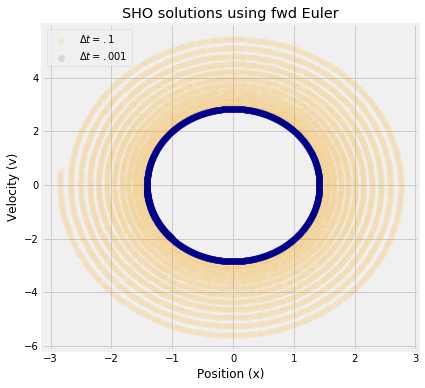

In [89]:
# Plot the state space
plt.figure(figsize = (6, 6))
plt.scatter(xs1, vs1, alpha = .1, color = 'orange', label = '$\Delta t = .1$')
plt.scatter(xs2, vs2, alpha = .1, color = 'darkblue', label = '$\Delta t = .001$')
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using fwd Euler')
plt.show()

The fact that the orange line diverges from the expected trajectory (the blue one does as well, though much slower) is not only related to the fact that it follows tangent lines, that are noisy linear approximations of a circle, but also due to so-called **numerical damping** (here: negative damping). 

Note that **Euler solvers** are generally not used in practice.

### Exercises

1a. Now use your forward Euler solver to compute [x(t = 0.5),v(t = 0.5)]T, given the same ODE, parameters, initial condition, and time step.

In [94]:
x_a, v_a = get_solution(-1, -2, k, m, g, beta, .1, 5)
x_a[-1], v_a[-1]

(-1.5283200000000001, 0.6246399999999999)

1b. Using the same ODE, solver, parameter values, initial condition, and time step, generate a 200-point trajectory and plot it in the state space (i.e., with the position x of the mass plotted on the x-axis and the velocity v on the y-axis).  Now repeat that plot with Δt = 0.11.  What are the differences between these two trajectories?

In [100]:
x_b1, v_b1 = get_solution(-1, -2, k, m, g, beta, .1, 200)
x_b2, v_b2 = get_solution(-1, -2, k, m, g, beta, .11, 200)

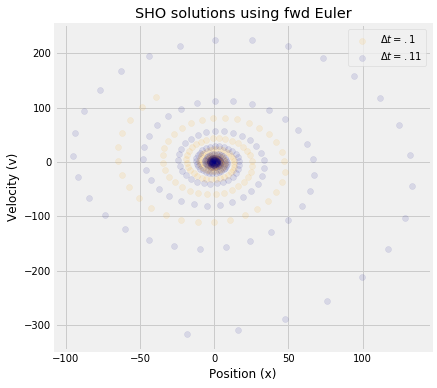

In [96]:
# Plot the state space
plt.figure(figsize = (6, 6))
plt.scatter(x_b1, v_b1, alpha = .1, color = 'orange', label = '$\Delta t = .1$')
plt.scatter(x_b2, v_b2, alpha = .1, color = 'darkblue', label = '$\Delta t = .11$')
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using fwd Euler')
plt.show()

2a. Write a backward Euler (also called implicit Euler) solver for the simple harmonic oscillator ODEs with k = 2, m = 0.5, and β = 0.

Use your backward Euler solver to compute [x(t = 0.5),v(t = 0.5)]T, given the same initial condition and time step as in problem 1(a) above.

In [118]:
x_2a1, v_2a1 = get_solution(-1, -2, k, m, g, beta, .1, 5, implicit = True)

In [121]:
x_2a1[-1], v_2a1[-1]

(-1.2450968576, 0.6135605248000002)

2b. Repeat problem 1(b) above using your backward Euler solver instead.  What are the differences between these two trajectories?

In [123]:
x_2b1, v_2b1 = get_solution(-1, -2, k, m, g, beta, .1, 200, implicit = True)
x_2b2, v_2b2 = get_solution(-1, -2, k, m, g, beta, .11, 200, implicit = True)

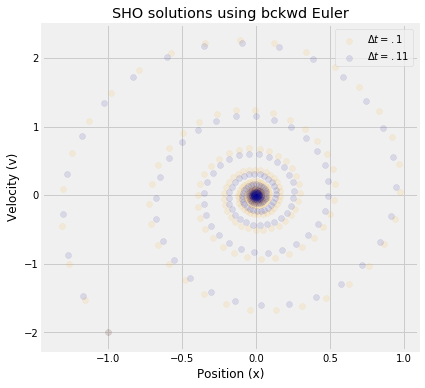

In [124]:
# Plot the state space
plt.figure(figsize = (6, 6))
plt.scatter(x_2b1, v_2b1, alpha = .1, color = 'orange', label = '$\Delta t = .1$')
plt.scatter(x_2b2, v_2b2, alpha = .1, color = 'darkblue', label = '$\Delta t = .11$')
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using bckwd Euler')
plt.show()

2c. Using the same ODE, parameter values, and initial condition, and a time step Δt = 0.1, generate two 50-point trajectories, one using forward Euler and the other using backward Euler.  Plot them both on the same state-space axes.  What is the difference?

In [128]:
x_2c1, v_2c1 = get_solution(-1, -2, k, m, g, beta, .1, 50)
x_2c2, v_2c2 = get_solution(-1, -2, k, m, g, beta, .1, 50, implicit = True)

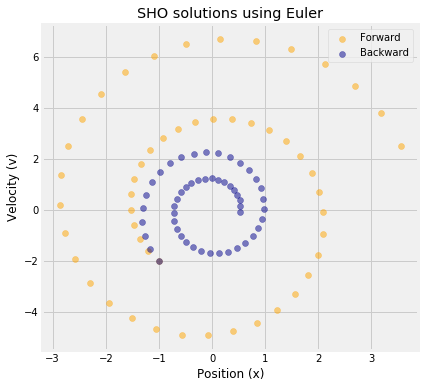

In [129]:
# Plot the state space
plt.figure(figsize = (6, 6))
plt.scatter(x_2c1, v_2c1, alpha = .5, color = 'orange', label = 'Forward')
plt.scatter(x_2c2, v_2c2, alpha = .5, color = 'darkblue', label = 'Backward')
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using Euler')
plt.show()

3. Forward and backward Euler employ different information about the vector field to move forwards in state space.  Based on your experience with these two methods, derive a third method that uses both a forward and backward Euler step to improve accuracy.

In [140]:
def get_composite_solution(x, v, k, m, g, beta, delta_t, n_steps, divider = 2):
    
    xs = [x]
    vs = [v]

    for i in range(n_steps):
        x_prime_ = vs[-1]
        v_prime_ = get_v_prime(xs[-1], vs[-1], k, m, g, beta)
        x_, v_ = xs[-1] + x_prime_ * delta_t, vs[-1] + v_prime_ * delta_t
        x__, v__ = xs[-1] + delta_t * v_, vs[-1] + delta_t * get_v_prime(x_, v_, k, m, g, beta)

        xs.append((x_ + x__) / divider)
        vs.append((v_ + v__) / divider)
        
    return xs, vs

In [146]:
x_3a, v_3a = get_composite_solution(-1, -2, k, m, g, beta, .1, 50)

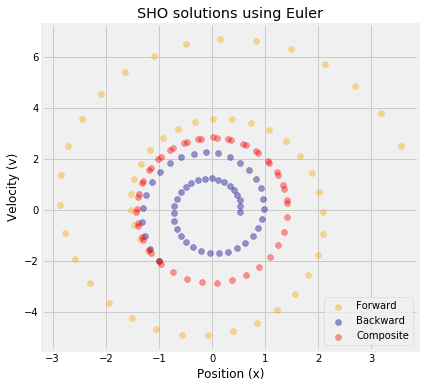

In [147]:
# Plot the state space
plt.figure(figsize = (6, 6))
plt.scatter(x_2c1, v_2c1, alpha = .4, color = 'orange', label = 'Forward')
plt.scatter(x_2c2, v_2c2, alpha = .4, color = 'darkblue', label = 'Backward')
plt.scatter(x_3a, v_3a, alpha = .4, color = 'red', label = 'Composite')
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using Euler')
plt.show()

Wow! The composite solver gives a really nice approximation!

It turns out this has it's name - **trapezoidal method**

In [157]:
# Repeat for t = 500
x_3a01, v_3a01 = get_solution(-1, -2, k, m, g, beta, .03, 500)
x_3a02, v_3a02 = get_solution(-1, -2, k, m, g, beta, .03, 500, implicit = True)
x_3a3, v_3a3 = get_composite_solution(-1, -2, k, m, g, beta, .03, 500)

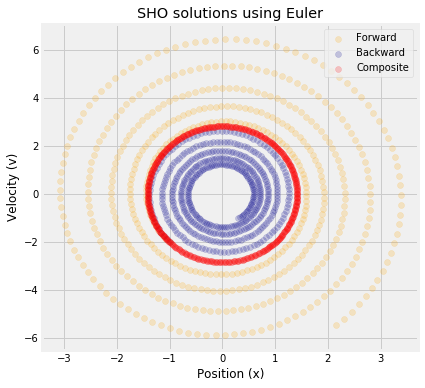

In [159]:
# Plot the state space
plt.figure(figsize = (6, 6))
plt.scatter(x_3a01, v_3a01, alpha = .2, color = 'orange', label = 'Forward')
plt.scatter(x_3a02, v_3a02, alpha = .2, color = 'darkblue', label = 'Backward')
plt.scatter(x_3a3, v_3a3, alpha = .2, color = 'red', label = 'Composite')
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using Euler')
plt.show()

4. Use your forward Euler solver from HW 5.4 on the SHO equations with k=2, m=1, and \beta=0, from the initial condition x(t=0)=-1 , v(t=0)=-2, with a timestep of 0.05, to compute the values of x and v at t=0.5.  

    **Note**: this is problem 1 on HW 5.4 with a different m and a different timestep.  Also note that we use the symbols "h" and "delta t" interchangeably to mean "timestep."]

In [160]:
k2 = 2
m2 = 1
x2 = -1
v2 = -2
step = .05
n_iter = 10

In [161]:
get_solution(x2, v2, k2, m2, g, beta, step, n_iter, implicit = False)

([-1,
  -1.1,
  -1.195,
  -1.2845,
  -1.368025,
  -1.4451275000000001,
  -1.515389875,
  -1.5784266125000002,
  -1.6338864006250002,
  -1.6814540556875002,
  -1.7208522787468752],
 [-2,
  -1.9,
  -1.7899999999999998,
  -1.6704999999999999,
  -1.54205,
  -1.4052475,
  -1.26073475,
  -1.1091957625,
  -0.9513531012499999,
  -0.7879644611874999,
  -0.6198190556187498])

5. As you observed in Homework 5.4, forward and backward Euler both make errors.  Combining the two of them, however, can be surprisingly effective.  Implement a solver that averages a forward and backward Euler step:

5a. Use this solver to generate a trajectory of the simple harmonic oscillator ODEs with k = 2, m = 0.5, and β = 0.  Start from the initial condition [x(t = 0), v(t = 0)]T = [-1, -2]T with a time step Δt = 0.1.  What is [x(t = 0.5), v(t = 0.5)]T?

In [167]:
x_5a, v_5a = get_composite_solution(-1, -2, 2, .5, g, beta, .1, 5)

In [168]:
x_5a[-1], v_5a[-1]

(-1.3811401568000001, 0.6211443264000003)

5b. Generate a 500-point trajectory of the same ODE system from [x(t = 0), v(t = 0)]T = [-1, -2]T with a time step of Δt = 0.01.  Which of the following describes this trajectory?

In [169]:
x_5b, v_5b = get_composite_solution(-1, -2, 2, .5, g, beta, .01, 500)

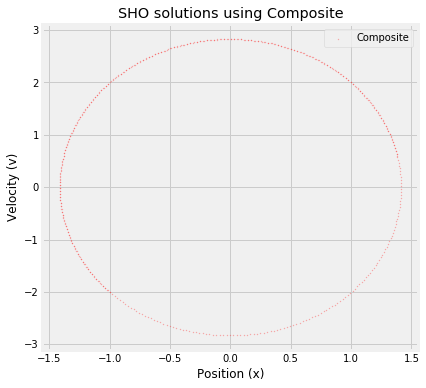

In [181]:
plt.figure(figsize = (6, 6))
plt.scatter(x_5b, v_5b, alpha = .2, color = 'red', label = 'Composite', s = 1)
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using Composite')
plt.show()

5d. Now generate a 5000-point trajectory of the same ODE system from [x(t = 0), v(t = 0)]T = [-1, -2]T with a time step of Δt = 0.01.  How is this plot qualitatively different than the plot you generated in part (b)?

In [172]:
x_5d, v_5d = get_composite_solution(-1, -2, 2, .5, g, beta, .01, 5000)

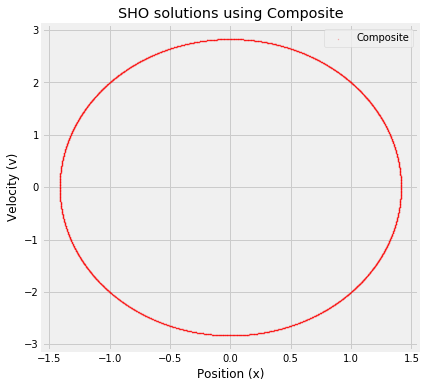

In [180]:
plt.figure(figsize = (6, 6))
plt.scatter(x_5d, v_5d, alpha = .2, color = 'red', label = 'Composite', s = 1)
plt.legend()
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('SHO solutions using Composite')
plt.show()

on the SHO equations with k=2, m=0.5, and =0, from the initial condition x(t=0)=-1 , v(t=0)=-2, with a timestep of 0.05, to compute the values of x and v at t=0.5. 

In [182]:
?get_composite_solution

In [184]:
ans = get_composite_solution(-1, -2, 2, .5, g, beta, .05, 10)

In [185]:
ans[0][-1], ans[1][-1]

(-1.3814436142192144, 0.6070044381607267)